# Churn analysis is the evaluation of a company's customer loss rate in order to reduce it. Also referred to as customer attrition rate, churn can be minimized by assessing your product and how people use it.

In [1]:
# churn analysis - in Business point for understanding customer behaviour  - customer will leave or stay
# churn analysis - in Human Resource point, understanding the employee attrition rate-employee will leave or stay

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("E:\Data science\Python\Churn_Modelling.csv")

In [3]:
data.head()  # data is about customers details,Building a model which predicts customer will exit or not

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [5]:
# sepearting predictors and outcome variable
x = data.iloc[:,3:12]
y = data.iloc[:,-1]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1


In [8]:
# Dealing with Missing data
x.isna().sum()                       #No missing data exists

CreditScore       0
Geography         0
Gender            0
Age               0
Tenure            0
Balance           0
NumOfProducts     0
HasCrCard         0
IsActiveMember    0
dtype: int64

<AxesSubplot:>

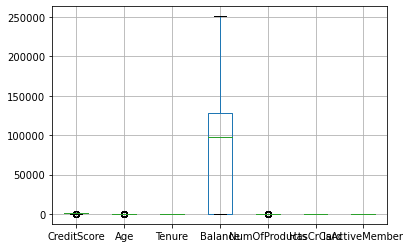

In [9]:
#Dealing with outliers  
x.boxplot()  # credit score and age might have outliers,let dig deep to understand

In [13]:
x['CreditScore'] = np.where(x['CreditScore']<400,x['CreditScore'].mean(),x['CreditScore'])

C:\Users\sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

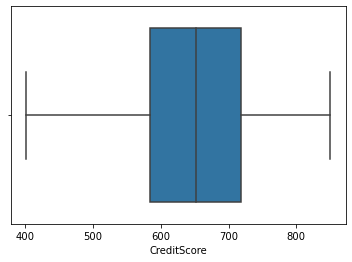

In [14]:
sns.boxplot(x['CreditScore'])   # values below 400 are outliers,so replacing with mean

In [20]:
x['Age'] = np.where(x['Age']>52,x['Age'].mean(),x['Age'])

In [22]:
x['Age'] = np.where(x['Age']<20,x['Age'].mean(),x['Age'])

C:\Users\sys\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

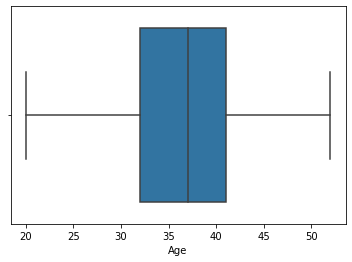

In [23]:
sns.boxplot(x['Age']) #values above 60 are outliers ,replacing with mean

In [26]:
# Dealing with categorical data,geography and gender are categorical
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619.0,France,Female,42.0,2,0.00,1,1,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1


In [27]:
x = pd.get_dummies(data=x,columns=['Geography','Gender'])

In [28]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,1,0,0,1,0
1,608.0,41.0,1,83807.86,1,0,1,0,0,1,1,0
2,502.0,42.0,8,159660.80,3,1,0,1,0,0,1,0
3,699.0,39.0,1,0.00,2,0,0,1,0,0,1,0
4,850.0,43.0,2,125510.82,1,1,1,0,0,1,1,0


In [30]:
names = x.columns

In [29]:
# Feature scaling - using minmax scalar
from sklearn import preprocessing

In [31]:
x = preprocessing.minmax_scale(x,feature_range=(0,1))

In [32]:
x = pd.DataFrame(x,columns=names)

In [33]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.485523,0.68750,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.461024,0.65625,0.1,0.334031,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.224944,0.68750,0.8,0.636357,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.663697,0.59375,0.1,0.000000,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000000,0.71875,0.2,0.500246,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0


# since the output variable is categorical we use classification methods

In [34]:
from sklearn import model_selection

In [35]:
x_train,x_test,y_train,y_test =  model_selection.train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
import xgboost as xgb
from sklearn import naive_bayes

In [37]:
lin_model = linear_model.LogisticRegression()
Dtree = tree.DecisionTreeClassifier()
Rand = ensemble.RandomForestClassifier()
adaboost  = ensemble.AdaBoostClassifier()
KNN = neighbors.KNeighborsClassifier()
XGB = xgb.XGBClassifier()
NB = naive_bayes.GaussianNB()

In [40]:
# Model fitting with training data
lin_model.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
adaboost.fit(x_train,y_train)
KNN.fit(x_train,y_train)
XGB.fit(x_train,y_train)
NB.fit(x_train,y_train)

C:\Users\sys\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:04:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GaussianNB()

In [41]:
#Predicting the outcome of each model
p1 = lin_model.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = adaboost.predict(x_test)
p5 = KNN.predict(x_test)
p6 = XGB.predict(x_test)
p7 = NB.predict(x_test)

In [42]:
# Find the Accuracy of the models
from sklearn import metrics

In [44]:
a1 =metrics.accuracy_score(p1,y_test)

In [45]:
a2 =metrics.accuracy_score(p2,y_test)
a3 =metrics.accuracy_score(p3,y_test)
a4 =metrics.accuracy_score(p4,y_test)
a5 =metrics.accuracy_score(p5,y_test)
a6 =metrics.accuracy_score(p6,y_test)
a7 =metrics.accuracy_score(p7,y_test)

In [50]:
print(a1,a2,a2,a4,a5,a6,a7)

0.822 0.7815 0.7815 0.8615 0.811 0.852 0.808


# out of all models,a4 accuracy is more, a4 is the accuracy of adaboost,then a6 which is XGboost